In [14]:
!pip install xgboost


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample
import xgboost as xgb
import pickle
import joblib
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
df = pd.read_csv(r'C:\Users\SreeKeerthiReddyThat\Downloads\framingham.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [18]:
features = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
            'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
            'diaBP', 'BMI', 'heartRate', 'glucose']

target = 'TenYearCHD'

In [19]:
X = df[features]
y = df[target]

In [20]:
# Impute numeric columns with median
X = X.fillna(X.median())

In [21]:

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

df_clean = df[features + [target]].dropna()

# Split into features (X) and target (y)
X = df_clean[features]
y = df_clean[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Convert to DataFrame (optional)
X_resampled_df = pd.DataFrame(X_resampled, columns=features)
y_resampled_df = pd.Series(y_resampled, name=target)

# Check class distribution after SMOTE
print("✅ Class distribution after SMOTE:")
print(y_resampled_df.value_counts())



✅ Class distribution after SMOTE:
TenYearCHD
0    3101
1    3101
Name: count, dtype: int64


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [23]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42,
                          use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)


c:\Users\SreeKeerthiReddyThat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:05:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [25]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8538251366120219

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       621
           1       0.60      0.11      0.18       111

    accuracy                           0.85       732
   macro avg       0.73      0.55      0.55       732
weighted avg       0.82      0.85      0.81       732



In [26]:
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [27]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [28]:
joblib.dump(model, "xgb_model.joblib")

['xgb_model.joblib']

In [29]:
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [30]:
with open("xgb_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [31]:
with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

In [32]:
sample_input = X_test.iloc[0:1]
sample_scaled = loaded_scaler.transform(sample_input)
prediction = loaded_model.predict(sample_scaled)

print("Predicted TenYearCHD:", prediction[0])

Predicted TenYearCHD: 0


C:\Users\SreeKeerthiReddyThat\AppData\Local\Temp\ipykernel_5884\2617622041.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance (%)', y='Feature', data=feature_importance_df, palette='coolwarm')


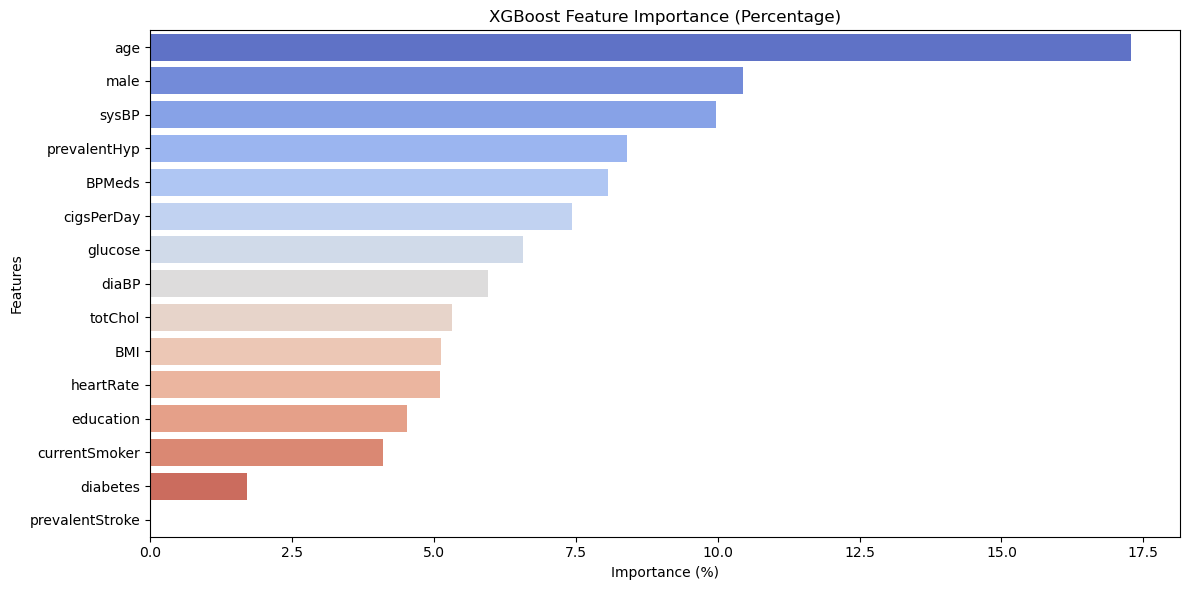

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from the trained XGBoost model
importances = model.feature_importances_  # model is your trained XGBClassifier
feature_names = X_train.columns

# Create DataFrame for plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Convert to percentage
feature_importance_df['Importance (%)'] = 100 * feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance (%)', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance (%)', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('XGBoost Feature Importance (Percentage)')
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


C:\Users\SreeKeerthiReddyThat\AppData\Local\Temp\ipykernel_5884\2798166586.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance (%)', y='Feature', data=feature_importance_df, palette='viridis')


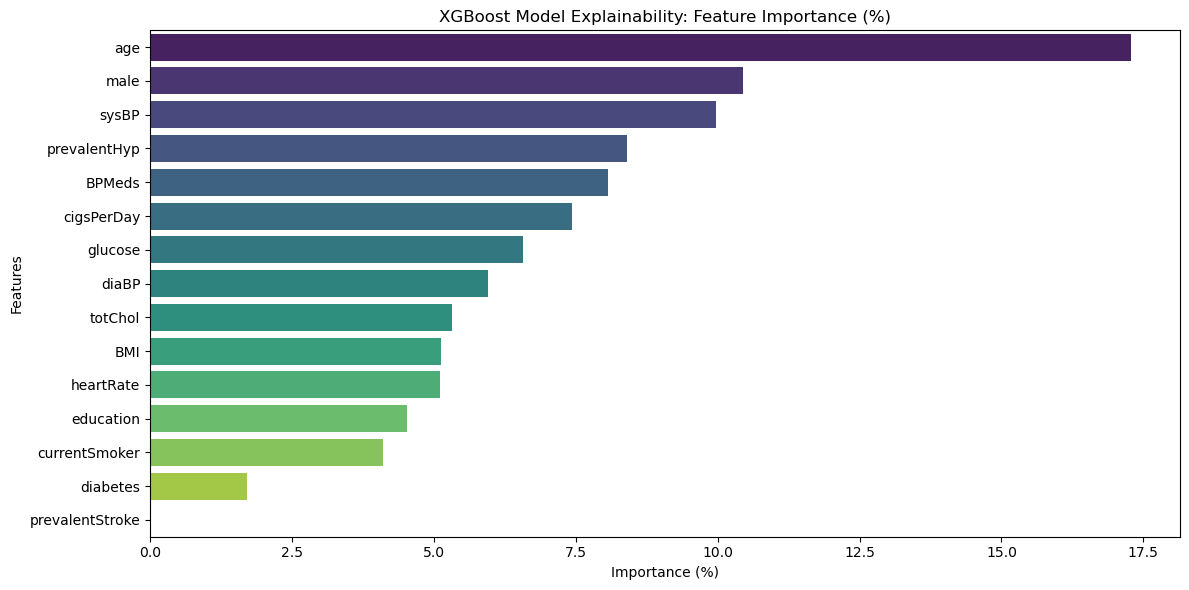

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Get raw feature importances from the trained XGBoost model
importances = model.feature_importances_  # This is a numpy array

# Step 2: Get the feature names from the training data
feature_names = X_train.columns

# Step 3: Create a DataFrame with raw and percentage importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 4: Convert raw importance to percentage (0–100 scale)
feature_importance_df['Importance (%)'] = 100 * feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()

# Step 5: Sort features by percentage importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance (%)', ascending=False)

# Step 6: Plot bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance (%)', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('XGBoost Model Explainability: Feature Importance (%)')
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Function to compute metrics
def evaluate_model(y_true, y_pred, dataset_name):
    print(f"\nEvaluation Metrics for {dataset_name}:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Evaluate on training data
evaluate_model(y_train, y_train_pred, "Training Set")

# Evaluate on testing data
evaluate_model(y_test, y_test_pred, "Testing Set")



Evaluation Metrics for Training Set:
Accuracy : 0.8834586466165414
Precision: 0.9646017699115044
Recall   : 0.24439461883408073
F1 Score : 0.38998211091234347

Confusion Matrix:
 [[2476    4]
 [ 337  109]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      2480
           1       0.96      0.24      0.39       446

    accuracy                           0.88      2926
   macro avg       0.92      0.62      0.66      2926
weighted avg       0.89      0.88      0.85      2926


Evaluation Metrics for Testing Set:
Accuracy : 0.8538251366120219
Precision: 0.6
Recall   : 0.10810810810810811
F1 Score : 0.183206106870229

Confusion Matrix:
 [[613   8]
 [ 99  12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       621
           1       0.60      0.11      0.18       111

    accuracy                           0.85       732
   macro avg 

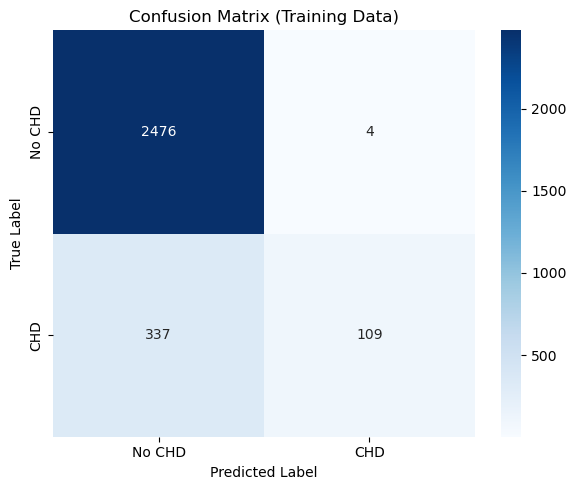

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
 
# Your confusion matrix
cm = np.array([[2476, 4],
               [337, 109]])
 
# Define class labels
labels = ['No CHD', 'CHD']
 
# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
 
 
